# 实验说明

+ 垃圾邮件识别是一个典型的文本分类任务。
+ 输入数据为一个邮件正文，输出为邮件的分类。包括垃圾邮件和正常邮件。
+ 我们从一个公开数据集中随机选取了5000 封垃圾邮件和5000 封正常邮件构建了一个简单的训练集。
+ 这10000条文本保存到一个文件中（文件格式为UTF-8），每封邮件正文在文件中保存为一行文本，其中前5000 条为垃圾邮件，后5000 条为正常邮件。


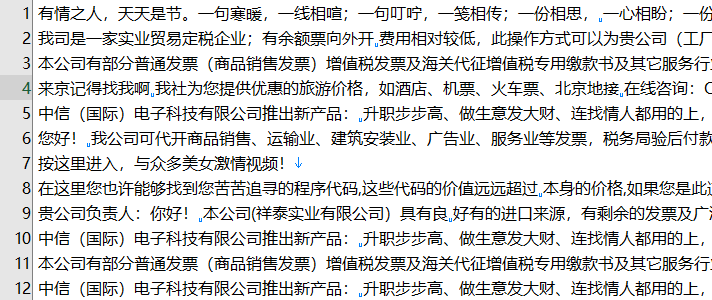

# 朴素贝叶斯

## 1. 特征提取

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import jieba

path1 = "email.txt"   
train_file = open(path1, 'r', encoding = "utf-8")
corpus = train_file.readlines()

split_corpus = []
for c in corpus:
    split_corpus.append(" ".join(jieba.lcut(c)))

cv = CountVectorizer(token_pattern=r"(?u)\b\w+\b")
X = cv.fit_transform(split_corpus).toarray()
Y = [0] * 5000 + [1] * 5000

print(X[:5])
print(Y[:5])

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Windows\Temp\jieba.cache
Loading model cost 0.493 seconds.
Prefix dict has been built successfully.


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0, 0, 0, 0, 0]


## 2. 模型训练和预测

In [2]:
from sklearn import model_selection 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.4)

gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred=gnb.predict(x_test)

print (metrics.accuracy_score(y_test, y_pred))
print (metrics.confusion_matrix(y_test, y_pred))


0.984
[[1967   60]
 [   4 1969]]
